In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

import mapboxgl
from mapboxgl.viz import*
from mapboxgl.utils import *
from config import token
from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.utils import df_to_geojson
from pyproj import Proj, transform

pd.options.display.max_columns=5000
pd.options.display.max_rows=5000

In [3]:
df = pd.read_excel('df.xlsx', index_col = 0)
df = df.drop(['관정깊이(m)', '자연수위(dtw, m)', '토지이용'], axis=1)

In [4]:
parameters = ['X','Y','pH','Cl','NO3-N','SO4','Na','K','Mg']
df[parameters] = df[parameters].apply(pd.to_numeric, errors='coerce', axis=1)

In [5]:
df = df.dropna(subset=['X', 'Y', 'elevation', 'year', 'month', 'EC', 'pH', 'HCO3', 'Cl', 'NO3-N', 'SO4', 'Na', 'K', 'Mg', 'Ca'])

In [6]:
out_location = df[df['elevation'] == 179].index
out_location2 = df[(df['elevation']==80) & (df['year']==2021)].index
df = df.drop(out_location)
df = df.drop(out_location2)

<AxesSubplot:ylabel='Density'>

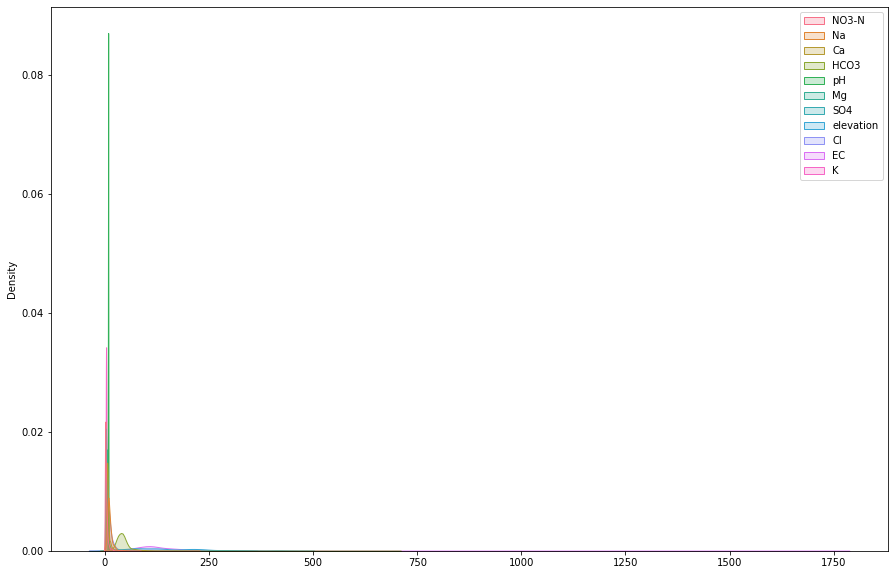

In [7]:
df_log = np.log1p(df)

plt.figure(figsize=(15,10))

# for i,col in enumerate(df_log[{'elevation','EC','pH','HCO3','Cl','NO3-N','SO4','Na','K','Mg','Ca'}]):
#     plt.subplot(4,3,i + 1)
sns.kdeplot(data=df[{'elevation','EC','pH','HCO3','Cl','NO3-N','SO4','Na','K','Mg','Ca'}], shade=True)

In [8]:
df.describe()

,X,Y,elevation,year,month,EC,pH,HCO3,Cl,NO3-N,SO4,Na,K,Mg,Ca
count,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000
mean,157583.339504,37326.484689,148.991244,2013.504427,6.787752,140.702051,7.673453,43.815224,13.095288,2.919727,4.203989,11.549304,3.391702,5.198790,6.512280
std,19621.923007,9425.355440,92.545097,4.557152,3.027054,82.869658,0.480838,21.184368,14.679273,4.444046,5.020125,9.562647,2.164403,3.699278,4.238914
min,122416.772700,18635.700000,13.890000,1993.000000,3.000000,8.000000,0.000000,0.000000,1.100000,0.000000,0.000000,0.900000,0.290000,0.140000,0.000000
25%,138993.500000,27669.690000,75.000000,2010.000000,3.000000,94.000000,7.400000,32.900000,6.900000,0.600000,2.000000,7.100000,2.400000,3.100000,4.100000
50%,158642.740000,37706.900000,132.000000,2014.000000,7.000000,119.000000,7.700000,40.500000,9.150000,1.600000,2.700000,9.300000,3.000000,4.400000,5.700000
75%,174651.900000,46131.100000,214.825000,2017.000000,10.000000,166.000000,8.000000,48.400000,14.000000,3.500000,4.700000,13.000000,3.800000,6.100000,7.400000
max,190811.440000,55303.046000,450.000000,2021.000000,12.000000,1740.800000,9.300000,698.800000,357.500000,84.000000,76.700000,222.600000,41.000000,56.000000,55.000000


In [12]:
param1 = df[['Na','Cl','HCO3','EC','elevation']]
param2 = df.drop(['Na','Cl','HCO3','EC','elevation','X','Y','year','month'],axis=1)

<AxesSubplot:ylabel='Density'>

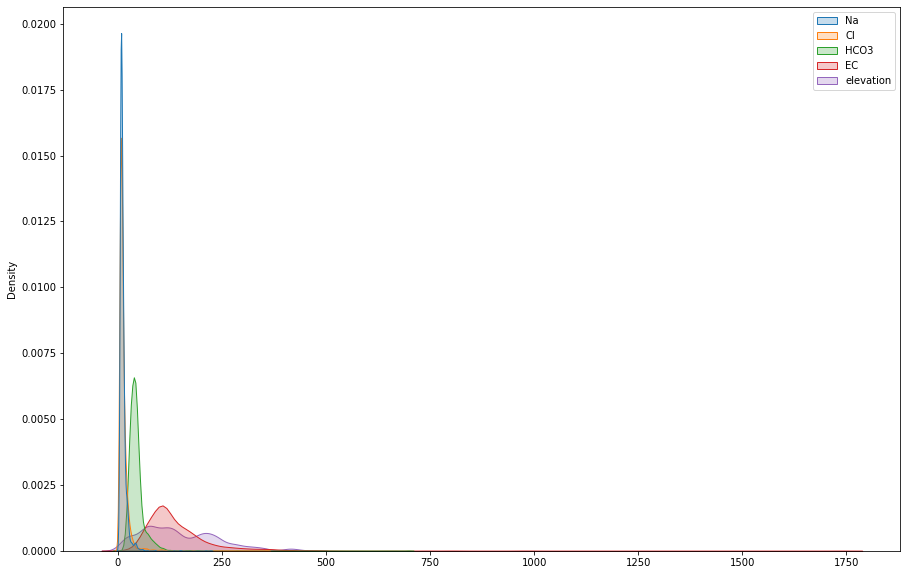

In [15]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=param1, shade=True)

<AxesSubplot:ylabel='Density'>

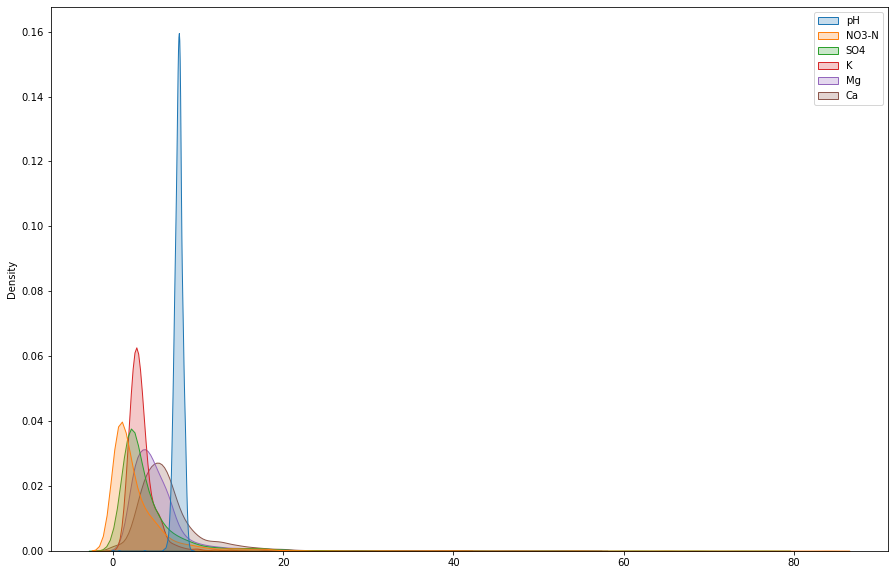

In [16]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=param2, shade=True)

In [28]:
params=df[{'elevation','EC','pH','HCO3','Cl','NO3-N','SO4','Na','K','Mg','Ca'}]

def kdeplot(params):
    return sns.kdeplot(data= )

NameError: name 'prams' is not defined

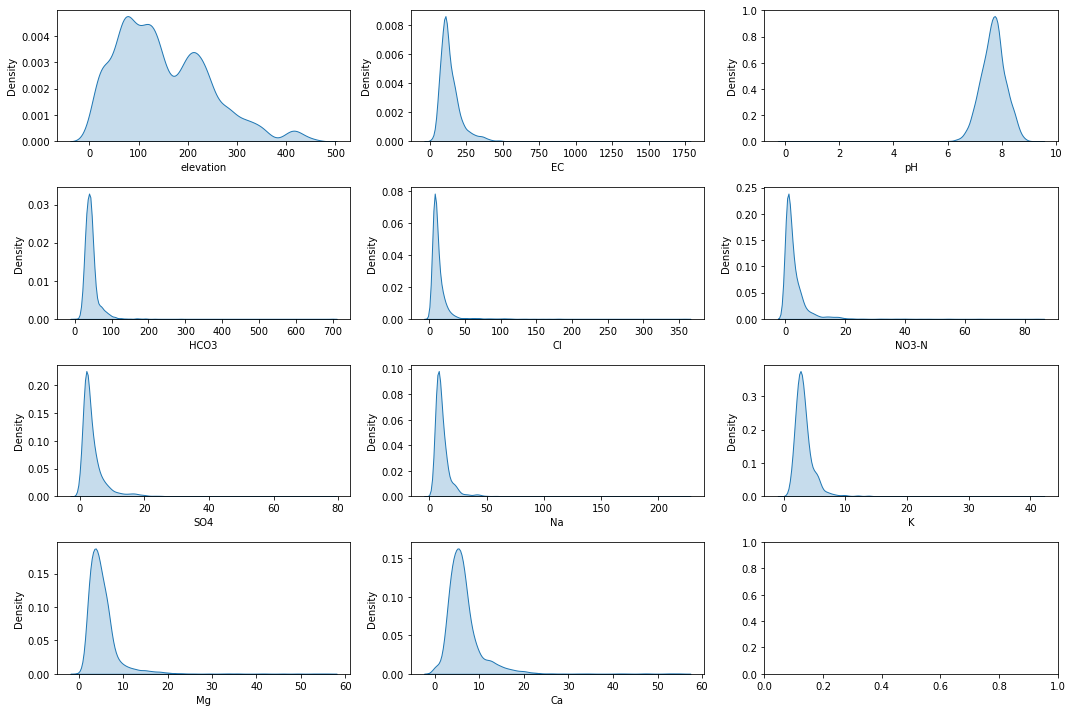

In [45]:
f, axs = plt.subplots(4,3,figsize=(15,10))

sns.kdeplot(data=df['elevation'], shade=True, ax=axs[0,0])
sns.kdeplot(data=df['EC'], shade=True, ax=axs[0,1])
sns.kdeplot(data=df['pH'], shade=True, ax=axs[0,2])
sns.kdeplot(data=df['HCO3'], shade=True, ax=axs[1,0])
sns.kdeplot(data=df['Cl'], shade=True, ax=axs[1,1])
sns.kdeplot(data=df['NO3-N'], shade=True, ax=axs[1,2])
sns.kdeplot(data=df['SO4'], shade=True, ax=axs[2,0])
sns.kdeplot(data=df['Na'], shade=True, ax=axs[2,1])
sns.kdeplot(data=df['K'], shade=True, ax=axs[2,2])
sns.kdeplot(data=df['Mg'], shade=True, ax=axs[3,0])
sns.kdeplot(data=df['Ca'], shade=True, ax=axs[3,1])
sns.kdeplot(data=None, shade=True, ax=axs[3,2])
f.tight_layout()